c:\Users\chrisler.nunes\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[*********************100%***********************]  11 of 11 completed
C:\Users\chrisler.nunes\AppData\Local\Temp\ipykernel_16204\2410234129.py:47: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(bt_data, BuyAndHoldPortfolioStrategy, cash=100000, commission=0.002)


Start                     2018-01-02 00:00...
End                       2024-10-29 00:00...
Duration                   2492 days 00:00:00
Exposure Time [%]                   98.099762
Equity Final [$]                340641.447842
Equity Peak [$]                 358262.070248
Return [%]                         240.641448
Buy & Hold Return [%]              242.255335
Return (Ann.) [%]                   20.130966
Volatility (Ann.) [%]               22.664093
Sharpe Ratio                         0.888232
Sortino Ratio                        1.497862
Calmar Ratio                           0.5213
Max. Drawdown [%]                  -38.616833
Avg. Drawdown [%]                   -2.610141
Max. Drawdown Duration      290 days 00:00:00
Avg. Drawdown Duration       24 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     240.945794
Worst Trade [%]                    240.945794
Avg. Trade [%]                    

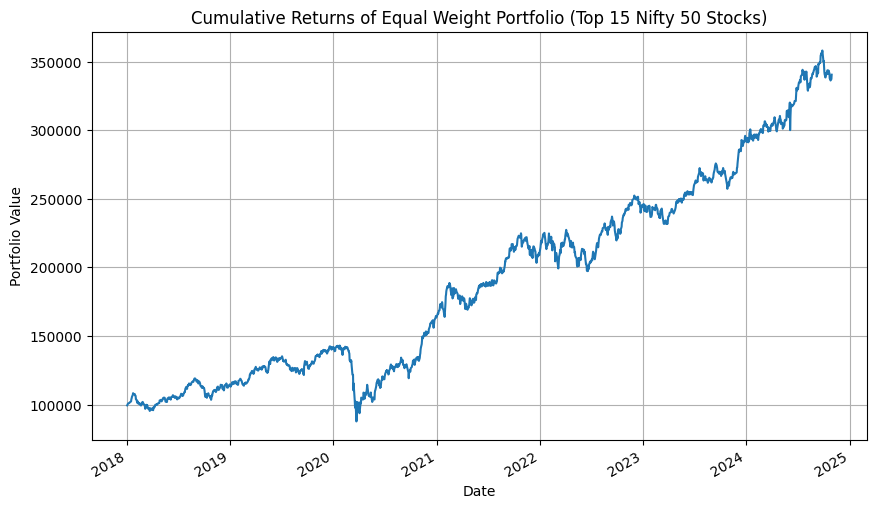

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtesting import Backtest, Strategy


nifty_50_tickers = [
    "RELIANCE.NS", "HDFCBANK.NS", "ICICIBANK.NS", "INFY.NS", "TCS.NS",
    "ITC.NS", "KOTAKBANK.NS", "LT.NS", "SBIN.NS",
    "BHARTIARTL.NS", "AXISBANK.NS"
]

data = yf.download(nifty_50_tickers, start="2018-01-01", end="2024-12-31")['Adj Close']
weights = np.full(len(nifty_50_tickers), 1 / len(nifty_50_tickers))

daily_returns = data.pct_change().dropna()
portfolio_returns = (daily_returns * weights).sum(axis=1)

initial_investment = 100000
portfolio_value = initial_investment * (1 + portfolio_returns).cumprod()

bt_data = pd.DataFrame({
    'Open': portfolio_value,
    'High': portfolio_value,
    'Low': portfolio_value,
    'Close': portfolio_value,
}, index=portfolio_returns.index)


class BuyAndHoldPortfolioStrategy(Strategy):
    def init(self):
        pass
    
    def next(self):
        # Buy the portfolio on the first day and hold it
        if len(self.trades) == 0:
            self.buy()


bt = Backtest(bt_data, BuyAndHoldPortfolioStrategy, cash=100000, commission=0.002)
stats = bt.run()
print(stats)

plt.figure(figsize=(10, 6))
portfolio_value.plot()
plt.title("Cumulative Returns of Equal Weight Portfolio (Top 15 Nifty 50 Stocks)")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.show()


In [2]:
rolling_max = portfolio_value.cummax()
drawdown = (portfolio_value - rolling_max) / rolling_max

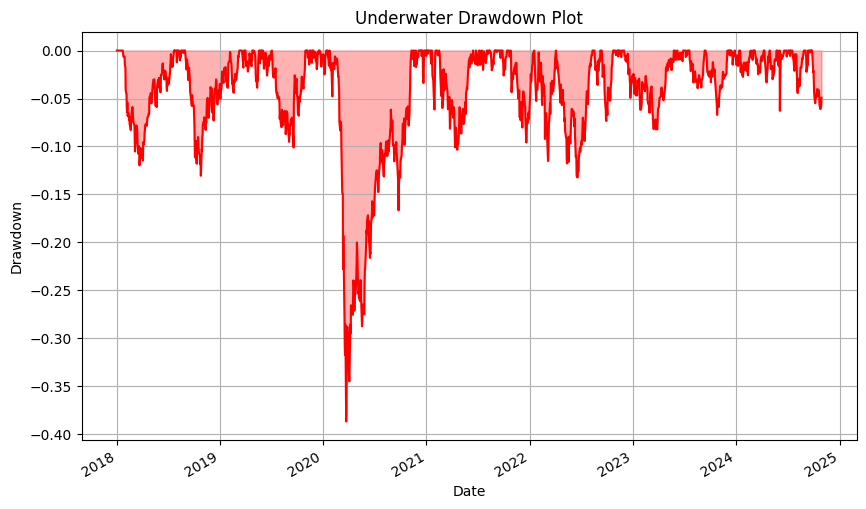

In [3]:
plt.figure(figsize=(10, 6))
drawdown.plot(color="red")
plt.fill_between(drawdown.index, drawdown, 0, color="red", alpha=0.3)
plt.title("Underwater Drawdown Plot")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()